In [146]:
import numpy as np
import pandas as pd
import seaborn as sns

In [147]:
import matplotlib.pyplot as plt

In [159]:
orig=pd.read_csv("D://DataScience/Assignments/5-MultiLinear Regression/50_Startups.csv",encoding='ANSI')
orig.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [160]:
orig.columns=['Rnd','Admin','Mkt','State','Profit']
orig.head()

,Rnd,Admin,Mkt,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [161]:
from sklearn.preprocessing import LabelEncoder
orig_labenc=LabelEncoder()
orig.State=raw_labenc.fit_transform (orig.State)

In [162]:
orig.head()

,Rnd,Admin,Mkt,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [164]:
orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rnd     50 non-null     float64
 1   Admin   50 non-null     float64
 2   Mkt     50 non-null     float64
 3   State   50 non-null     int32  
 4   Profit  50 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


In [166]:
x=orig[['Rnd','Admin','Mkt','State']]
x.head()

,Rnd,Admin,Mkt,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


No null values

In [168]:
y=orig[['Profit']]
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


<AxesSubplot:>

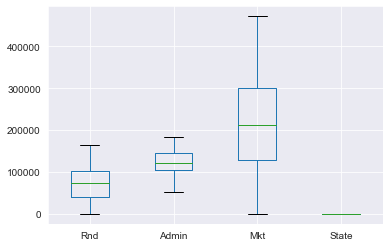

In [169]:
## To check scalling is done
x.boxplot()

## Check for Correlation

In [170]:
orig.corr()

,Rnd,Admin,Mkt,State,Profit
Rnd,1.000000,0.241955,0.724248,0.104685,0.972900
Admin,0.241955,1.000000,-0.032154,0.011847,0.200717
Mkt,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


<AxesSubplot:>

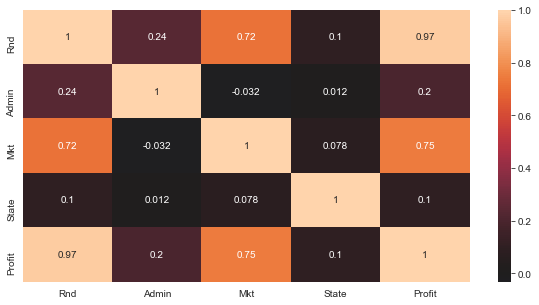

In [173]:
corr=orig.corr()
top_features=corr.index
plt.figure(figsize=(10,5))
sns.heatmap(orig[top_features].corr(),annot=True, center=0)

Highly significant variables:
Rnd and Marketing is higly vorrelated

Not much Weak Significant variables

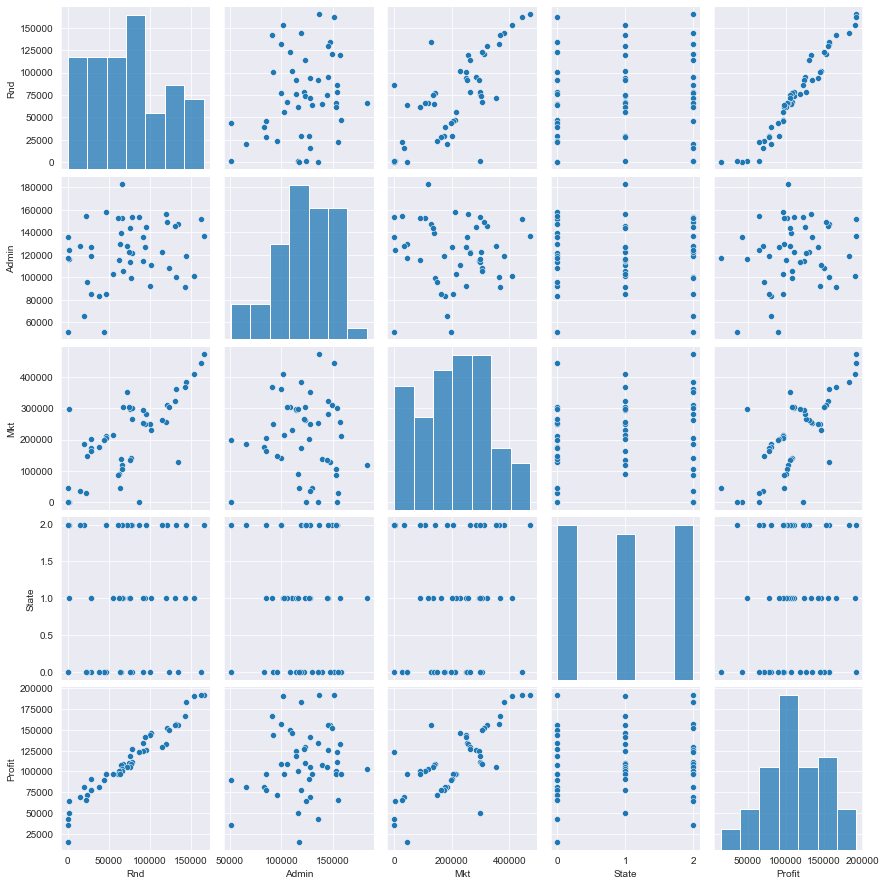

In [174]:
sns.set_style(style='darkgrid')
sns.pairplot(orig)

<AxesSubplot:>

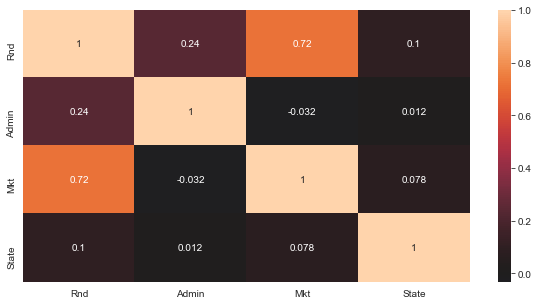

In [175]:
##To check multicollinearity among input variables
corr=x.corr()
top_features=corr.index
plt.figure(figsize=(10,5))
sns.heatmap(x[top_features].corr(),annot=True, center=0)

All the variables are independant

## Model

In [184]:
#Build model
import statsmodels.formula.api as smf 
model_all = smf.ols('Profit~Rnd+Admin+Mkt+State',data=orig).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           8.51e-29
Time:                        11:48:15   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
Rnd            0.8058      0.046     17.609      0.000       0.714       0.898
Admin         -0.0268      0.052     -0.520      0.606      -0.131       0.077
Mkt            0.0272      0.017      1.637      0.109      -0.006       0.061
State        -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on sumarry of model:
R=Square value olds good but
Admin, Mkt and State are p >=0.05

In [187]:
import statsmodels.formula.api as smf 
model_admin = smf.ols('Profit~Admin',data=orig).fit()
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 06 Dec 2020   Prob (F-statistic):              0.162
Time:                        11:48:36   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [185]:
import statsmodels.formula.api as smf 
model_mkt = smf.ols('Profit~Mkt',data=orig).fit()
model_mkt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           4.38e-10
Time:                        11:48:27   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Mkt            0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [186]:
import statsmodels.formula.api as smf 
model_state = smf.ols('Profit~State',data=orig).fit()
model_state.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5026
Date:                Sun, 06 Dec 2020   Prob (F-statistic):              0.482
Time:                        11:48:33   Log-Likelihood:                -600.39
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.071e+05   9005.386     11.891      0.000     8.9e+04    1.25e+05
State       4925.6356   6947.806      0.709      0.482   -9043.865    1.89e+04
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.134
Skew:                           0.047   Prob(JB):                        0.935
Kurtosis:                       2.765   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
import statsmodels.formula.api as smf 
model_1 = smf.ols('Profit~Rnd+Admin+Mkt',data=orig).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           4.53e-30
Time:                        12:08:58   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Rnd            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mkt            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [205]:
import statsmodels.formula.api as smf 
model_2 = smf.ols('Profit~Rnd+Mkt',data=orig).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           2.16e-31
Time:                        12:09:09   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
Rnd            0.7966      0.041     19.266      0.000       0.713       0.880
Mkt            0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [206]:
import statsmodels.formula.api as smf 
model_3 = smf.ols('Profit~Rnd',data=orig).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           3.50e-32
Time:                        12:09:34   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
Rnd            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Based on above model State variable is not significant at all

## VIF value validation

In [194]:
rsq_rnd= smf.ols('Rnd~Admin+Mkt+State',data=orig).fit().rsquared  
vif_rnd = 1/(1-rsq_rnd)

rsq_admin = smf.ols('Admin~Rnd+Mkt+State',data=orig).fit().rsquared  
vif_admin = 1/(1-rsq_admin)

rsq_mkt = smf.ols('Mkt~Rnd+Admin+State',data=orig).fit().rsquared  
vif_mkt = 1/(1-rsq_hp) 

rsq_state = smf.ols('State~Rnd+Admin+Mkt',data=orig).fit().rsquared  
vif_state = 1/(1-rsq_state)

# Storing vif values in a data frame
vif = {'Variables':['Rnd','Admin','Mkt','State'],'VIF':[vif_rnd,vif_admin,vif_mkt,vif_state]}
Vif_frame = pd.DataFrame(vif)  
Vif_frame

,Variables,VIF
0,Rnd,2.481178
1,Admin,1.175315
2,Mkt,1.419422
3,State,1.011281


By looking at VIF there is no collinearity issue since everything below 5

## Regressors Vs Residuals or Partial Regression plot

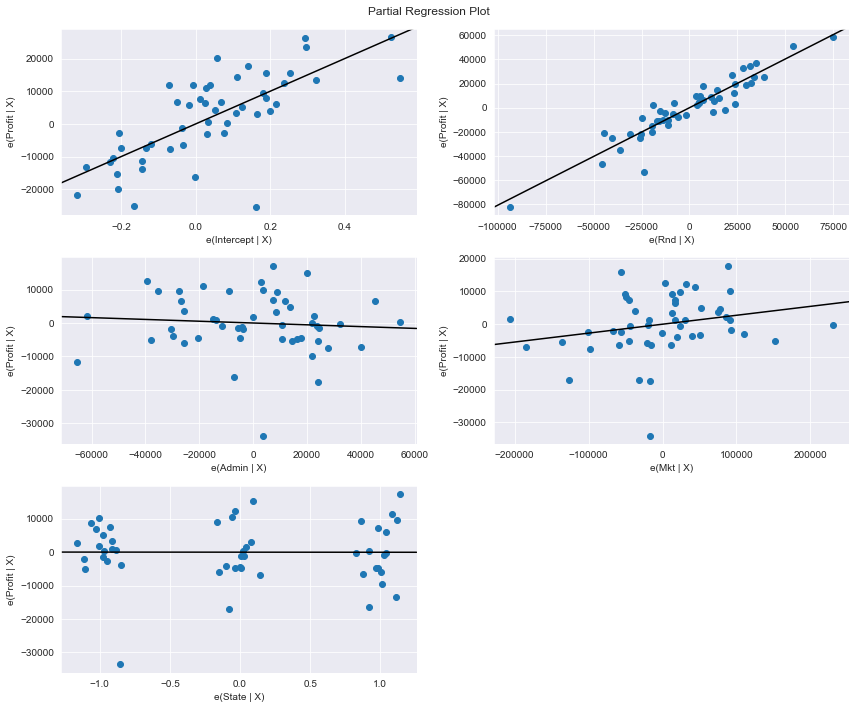

In [195]:
import statsmodels.api as sm
fig=plt.figure(figsize=(12,10))
fig=sm.graphics.plot_partregress_grid(model_all,fig=fig)
plt.show()

Based on above plots understand that State variable is almost flat which means this we can consider to drop

## Prepare train and test data

In [212]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=0)

## Prediction

In [214]:
y1_pred=pd.DataFrame(model_1.predict(x_test))
print(y1_pred)

                0
28  101660.026005
11  135573.712961
10  135509.016367
41   74802.556239
2   182147.279096
27  114408.071457
38   69697.430648
31   97687.856276
22  114706.981717
4   172139.514183


In [237]:
y2_pred=pd.DataFrame(model_2.predict(x_test))
print(y2_pred)

                0
28  103125.012760
11  134638.870075
10  135011.914724
41   74113.888705
2   181405.378097
27  114978.605150
38   68631.318323
31   98314.548854
22  114990.384639
4   171127.623218


In [238]:
y3_pred=pd.DataFrame(model_3.predict(x_test))
print(y3_pred)

                0
28  105460.142715
11  135036.085865
10  136096.363971
41   72861.580008
2   180116.657078
27  110633.799600
38   66314.863316
31  101261.181026
22  112245.813246
4   170433.973450


C:\Users\jeysu_000\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jeysu_000\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Accuracy: 95.66256243384497 %


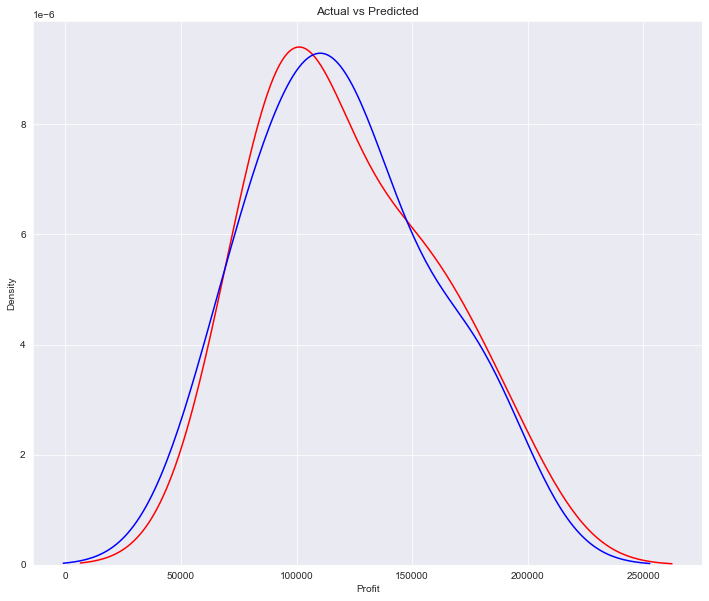

In [224]:
## Model_1
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
width=12
height=10
yhat=y1_pred
plt.figure(figsize=(width, height))
ax1=sns.distplot(y_test, hist=False, color = "r", label="Actual")
sns.distplot(yhat, hist = False, color = "b", label="Predicted", ax=ax1)

plt.title('Actual vs Predicted')
plt.xlabel('Profit')
accuracy=metrics.r2_score(y_test,y1_pred)
print('Accuracy:', round(accuracy*100,32),'%')
plt.show()
plt.close()

C:\Users\jeysu_000\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jeysu_000\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Accuracy: 95.09473296144157 %


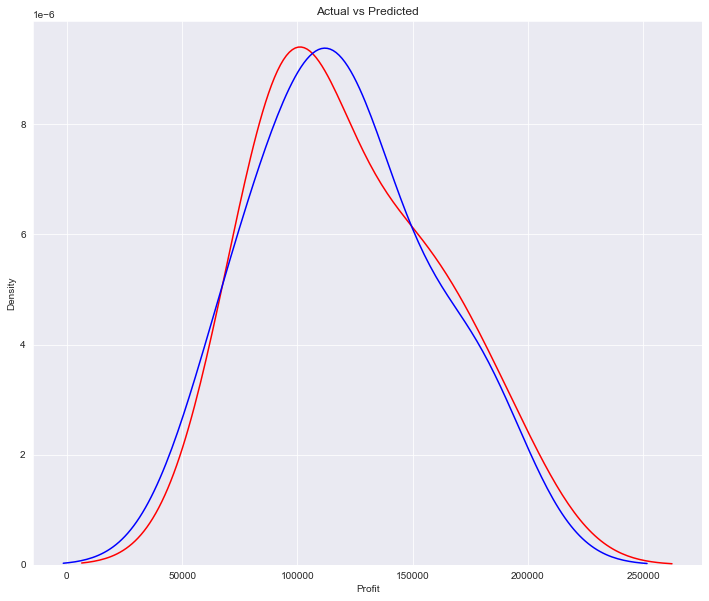

In [239]:
## Model_2
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
width=12
height=10
yhat=y2_pred
plt.figure(figsize=(width, height))
ax1=sns.distplot(y_test, hist=False, color = "r", label="Actual")
sns.distplot(yhat, hist = False, color = "b", label="Predicted", ax=ax1)

plt.title('Actual vs Predicted')
plt.xlabel('Profit')
accuracy=metrics.r2_score(y_test,y2_pred)
print('Accuracy:', round(accuracy*100,32),'%')
plt.show()
plt.close()

C:\Users\jeysu_000\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jeysu_000\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Accuracy: 95.1191195232613 %


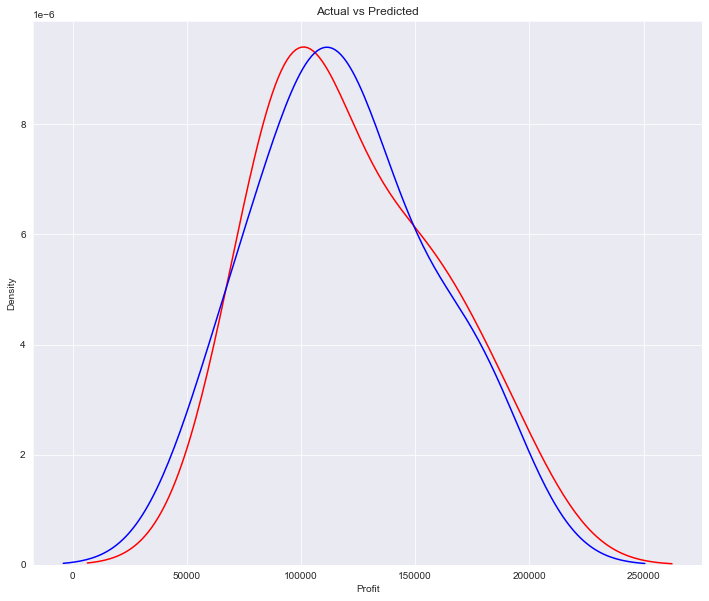

In [240]:
## Model_3
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
width=12
height=10
yhat=y3_pred
plt.figure(figsize=(width, height))
ax1=sns.distplot(y_test, hist=False, color = "r", label="Actual")
sns.distplot(yhat, hist = False, color = "b", label="Predicted", ax=ax1)

plt.title('Actual vs Predicted')
plt.xlabel('Profit')
accuracy=metrics.r2_score(y_test,y3_pred)
print('Accuracy:', round(accuracy*100,32),'%')
plt.show()
plt.close()

## Model validation

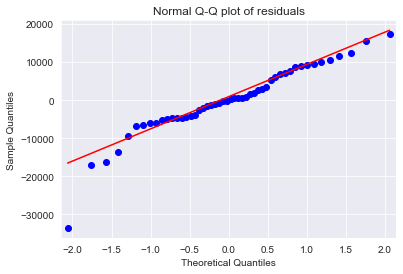

In [225]:
#Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
qqplot=sm.qqplot(model_1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

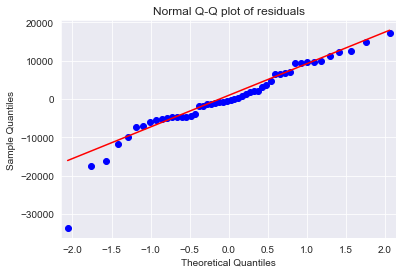

In [241]:
qqplot=sm.qqplot(model_2.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

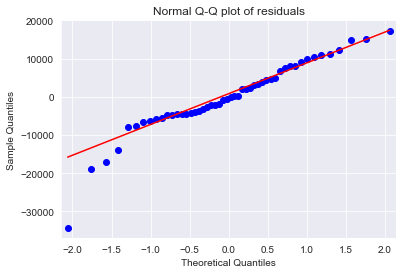

In [242]:
qqplot=sm.qqplot(model_3.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [227]:
#Residual Plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

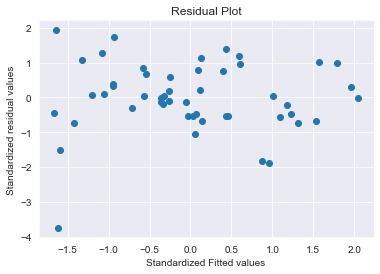

In [228]:
plt.scatter(get_standardized_values(model_1.fittedvalues),
            get_standardized_values(model_1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

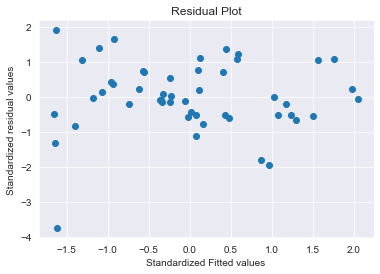

In [243]:
plt.scatter(get_standardized_values(model_2.fittedvalues),
            get_standardized_values(model_2.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

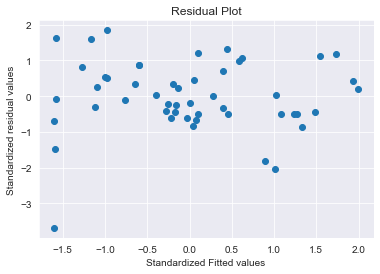

In [244]:
plt.scatter(get_standardized_values(model_3.fittedvalues),
            get_standardized_values(model_3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()